# Problem Set 2
we recommend **Google Chrome** for an optimal editing experience.


## Data Description
This problem set will extend the cancer mortality dataset in PS1 to includes more countries.

You will also merge the cancer mortality dataset with a population dataset and a country code table, which offers more diverse data exploration and analysis.


In [178]:
import pandas as pd
import altair as alt
from google.colab import files

cancer_df = pd.read_csv('https://raw.githubusercontent.com/hms-dbmi/bmi706-2022/main/cancer_data/cancer_ICD10.csv')

population_df = pd.read_csv('https://raw.githubusercontent.com/hms-dbmi/bmi706-2022/main/cancer_data/population.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/hms-dbmi/bmi706-2022/main/cancer_data/country_codes.csv', dtype = {'conuntry-code': str})

In [179]:
cancer_df.head()

,Country,Year,Cancer,Sex,Age <5,Age 5-14,Age 15-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age >64
0,Anguilla,2000,Malignant neoplasm of breast,F,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Anguilla,2000,Malignant neoplasm of lip oral cavity and pharynx,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,Anguilla,2000,Malignant neoplasm of ovary,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Anguilla,2000,Malignant neoplasm of prostate,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,Anguilla,2000,Malignant neoplasm of stomach,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [180]:
country_df.head()

,Country,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [181]:
population_df.head()

,Country,Year,Sex,Age <5,Age 5-14,Age 15-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age >64
0,Cape Verde,1980,M,19200.0,39200.0,22700.0,12600.0,12600.0,7800.0,8200.0,8200.0
1,Cape Verde,1980,F,22400.0,45400.0,26300.0,14600.0,14600.0,9100.0,9500.0,9600.0
2,Egypt,1955,M,693700.0,1218300.0,916300.0,735800.0,669000.0,453200.0,221100.0,144100.0
3,Egypt,1955,F,696200.0,1214100.0,924200.0,770900.0,620200.0,428700.0,231000.0,164100.0
4,Egypt,1956,M,735300.0,1292400.0,970900.0,779500.0,709100.0,479900.0,234600.0,152000.0


# Problem 1. Data Merge and Clean (25 points)

When solving Problem 1, you are recommended to follow the steps in the same order of P1.1, P1.2, P1.3, but this will not influence the credits you receive.


### P1.1: Melt the population data and the cancer mortality data (5 points).
This is similar to what you did in PS1, you are required to
- Replace the current eight age group columns in the cancer datasets with two new columns, called "Age" and "Death".
- Replace the current eight age group columns in the cancer datasets with two new columns, called "Age" and "Population".


### P1.2: Merge the cancer mortality data, population data, and the provided country code (10 points).


The cancer dataset contains the absolute number of deaths.
You will need both the absolute number of deaths and the corresponding population to calculate the mortality rate. This normalization step will allow comparing mortality rates across countries in the following problems.


- for each row of the cancer_df, please add two new columns: one column called `population` from the population dataset (population_df); one column called `country-code` based on the country codes table (country_df).

Cancer Mortality Rate = (Cancer Deaths / Population) × 100,000.

Ref: https://seer.cancer.gov/statistics/types/mortality.html

You do not need to calculate the rate here.
We will do it in the following problems.

**Tips:** You are recommended to use the [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function in pandas.  
**Tips**: Carefully think about how you want to merge these two datasets. Pandas provides various methods for merging (i.e., the `how` parameter). You may not want to use the default one.


### P1.3: Clean dataset and remove Nan values (10 points).

Due to the value missing in population dataset, there will be many NaN values after merging.

- If we only miss the country population values for certain years, we can fill the missing values with the nearest valid values in the `population` column (same country & sex & age).

- Otherwise (i.e., the population dataset has no records for a certain country), we need to remove the rows that have NaN values.

**Tips:** You are recommended to use the [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html), and [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function in pandas.

[How to fillna with groupBy](https://stackoverflow.com/questions/46391128/pandas-fillna-using-groupby)


After all the steps above, the dataframe should look like this
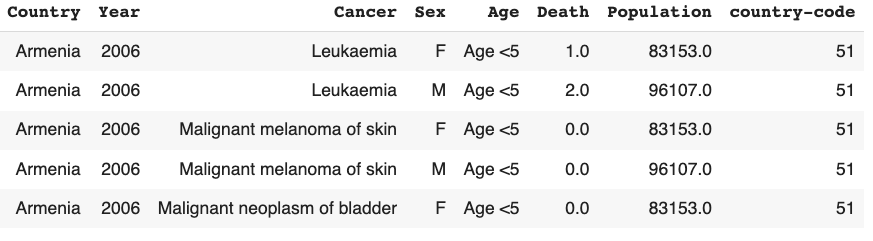

In [182]:

###########################
# P1.1 melt the cancer_df and the pop_df seperately
age_cols = cancer_df.columns[cancer_df.columns.str.contains('Age')] # a list of age groups

cancer_df_long = pd.melt(
     # add your code here
     cancer_df,  id_vars=['Country', 'Year', 'Cancer', 'Sex'], var_name='Age', value_name='Death'
)
population_df_long = pd.melt(
     # add your code here
     population_df, id_vars=['Country', 'Year', 'Sex'], var_name='Age', value_name='Population'
)

In [183]:
############################
# P1.2 add two new columns to the cancer_df by merging with the population_df and the country_df

cancer_df_new = cancer_df_long.merge(
    # add population column
    population_df_long[['Year', 'Sex', 'Age', 'Country','Population']], on=['Year', 'Sex', 'Age', 'Country'], how='left'
).merge(
    # add country code column
    country_df[['Country','country-code']], left_on='Country', right_on='Country', how='left'
)

In [184]:

###################
# P1.3 clean merged

print('missing values before cleaning:\n', cancer_df_new.isna().sum(), '\n')

cancer_df_new['Population'] = cancer_df_new.groupby(
    ['Country', 'Sex', 'Age'], group_keys=False)['Population'].apply(
        lambda x: x.ffill().bfill())

print('missing values after value filling:\n', cancer_df_new.isna().sum(), '\n')

# remove rows with NaN values
cancer_df_new.dropna(inplace=True)

print(cancer_df_new.isna().sum())

cancer_df_new.head()

missing values before cleaning:
 Country              0
Year                 0
Cancer               0
Sex                  0
Age                  0
Death                0
Population      256712
country-code     77048
dtype: int64 

missing values after value filling:
 Country              0
Year                 0
Cancer               0
Sex                  0
Age                  0
Death                0
Population      177776
country-code     77048
dtype: int64 

Country         0
Year            0
Cancer          0
Sex             0
Age             0
Death           0
Population      0
country-code    0
dtype: int64


,Country,Year,Cancer,Sex,Age,Death,Population,country-code
1642,Armenia,2006,Leukaemia,F,Age <5,1.0,83153.0,51.0
1643,Armenia,2006,Leukaemia,M,Age <5,2.0,96107.0,51.0
1644,Armenia,2006,Malignant melanoma of skin,F,Age <5,0.0,83153.0,51.0
1645,Armenia,2006,Malignant melanoma of skin,M,Age <5,0.0,96107.0,51.0
1646,Armenia,2006,Malignant neoplasm of bladder,F,Age <5,0.0,83153.0,51.0


# Problem 2. Simple Charts with Drop-down and Brush Selectors (25 points)
In this problem, you will create two linked simple charts (one bar chart as an overview and one line chart with points as a detailed view).
Using a brush selector in the overview will update the detailed view accordingly.
You will also implement a drop-down selector where you can select a specific cancer type to update both line charts.

Please refer to this [demo](https://qianwen.info/demos/chart1.html) for more details.

#### P2.1: A drop-down selector where users can select cancer types and update the two charts (10 points)
#### P2.2: Two charts (one bar chart as an overview and one line chart with points as a detailed view) that show the Cancer Mortality Rate for four different countries (5 points)
#### P2.3: A brush selector in the bottom chart that updates the top chart based on user brush (10 pints).

**reference:**
- https://altair-viz.github.io/gallery/interval_selection.html
- https://altair-viz.github.io/gallery/multiple_interactions.html


In [185]:
# here we calculate the cancer mortality
df1 = cancer_df_new.groupby(['Country', 'Year', 'country-code', 'Cancer']).sum().reset_index()
df1['Rate'] = df1['Death']/df1['Population'] * 1e5
df1= df1[df1['Year'].between(1997, 2020)]

########################
# P2.1 create a drop-down cancer selector
cancers = df1['Cancer'].unique()
cancer_dropdown = alt.binding_select(options=cancers)
cancer_select = alt.selection_single(
    fields=['Cancer'],
    bind=cancer_dropdown,
    name='Cancer'
)

# only compare several selected countries
countries = ['Japan', 'United States of America', 'Thailand', 'Australia']
df1 = df1[df1['Country'].isin(countries)]

#######################
# p2.2 create two charts

base = alt.Chart(df1).properties(
    width=550
).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Rate:Q', title='Rate'),
    color=alt.Color(
        'Country:N',legend=alt.Legend(title="Country")),
    tooltip=['Country', 'Rate', 'Year']
).add_selection(cancer_select).properties(
)

########################
# P2.1 add the drop-down selection to the chart

# add your code here
line_chart = base.mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Rate:Q', title='Rate'),
    color=alt.Color(
        'Country:N',legend=alt.Legend(title="Country")),
    tooltip=['Country', 'Rate', 'Year']
).add_selection(
    cancer_select
).transform_filter(
    cancer_select
).properties(
    title='Compare Cancer Mortality Across Countries'
)

bar_chart = base.mark_bar().encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Rate:Q', title='Rate'),
    color=alt.Color(
        'Country:N', legend=alt.Legend(title="Country")),
    tooltip=['Country', 'Rate', 'Year']
).add_selection(
    cancer_select
).transform_filter(
    cancer_select
).properties(
)

########################
# p2.3 add brush
brush = alt.selection_interval( encodings=['x'])

# add your code here
upper = line_chart.add_selection(brush)

# add your code here
lower = bar_chart.add_selection(brush)
lower = lower.properties(
    height=50
)

chart1 = upper & lower

chart1

<ipython-input-185-5791b8761318>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = cancer_df_new.groupby(['Country', 'Year', 'country-code', 'Cancer']).sum().reset_index()


alt.VConcatChart(...)

# Problem 3. Coordinated Map Visualizations (25 points)
In this problem, you will create two choropleth maps that are linked to each other, one showing the population and the other showing the overall cancer mortality. Clicking on a certain country in one visualization will highlight the country in both visualizations.


Please refer to this [Demo](https://qianwen.info/demos/chart2.html) for more details.

#### P3.1: A map visualization showing the population by country (5 points).
#### P3.2: A map visualization showing the overall cancer mortality rates by country (10 points).
#### P3.3: Tooltips that show country names and color-encoded values (i.e., population or mortality rate) upon mouse hover (5 point).
#### P3.4: Clicking one country will highlight this country in both visualizations (5 points).

**reference:**
- https://altair-viz.github.io/gallery/choropleth.html
- https://github.com/altair-viz/altair/issues/2044

In [ ]:
df2.head()

,Country,Year,country-code,Death,Population,Rate
12,Armenia,2018,51.0,5199.0,2969001.0,175.109405
33,Australia,2018,36.0,46591.0,24992369.0,186.420903
52,Austria,2018,40.0,20574.0,8837707.0,232.797942
91,Belarus,2018,112.0,18597.0,9483499.0,196.098508
112,Belgium,2018,56.0,26148.0,11427068.0,228.825102


In [186]:
# here we use the cancer_df_new you created in problem 1
df2 = cancer_df_new.groupby(['Country', 'Year', 'country-code']).sum().reset_index()
df2['Population'] = cancer_df_new.groupby(['Country', 'Year', 'country-code', 'Cancer']).sum().groupby(['Country', 'Year', 'country-code' ]).first().reset_index()['Population']
df2['Rate'] = df2['Death']/df2['Population'] * 1e5

from vega_datasets import data
source = alt.topo_feature(data.world_110m.url, 'countries')

year = 2018 # only visualize for 2018
df2 = df2[df2['Year']==year]

width = 600
height  = 300
project = 'equirectangular'

# a gray map using as the visualization background
background = alt.Chart(source
).mark_geoshape(
    fill='#aaa',
    stroke='white'
).properties(
    width=width,
    height=height
).project(project)

######################
# P3.4 create a selector to link two map visualizations
selector = alt.selection_single(
    on='click', empty='all', fields=['Country']
)


chart_base = alt.Chart(source
    ).properties(
        width=width,
        height=height
    ).project(project
    ).add_selection(selector
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(df2, "country-code", ["Rate", 'Country', 'Population', 'Year']),
    )

# fix the color schema so that it will not change upon user selection
rate_scale = alt.Scale(domain=[df2['Rate'].min(), df2['Rate'].max()], scheme='oranges')
rate_color = alt.Color(field="Rate", type="quantitative", scale=rate_scale)

chart_rate = chart_base.mark_geoshape().encode(
    ######################
    # P3.1 map visualization showing the mortality rate
    color=alt.Color('Rate:Q', scale=rate_scale, title='Cancer Mortality Rate'),

    ######################
    # P3.3 tooltip
    tooltip=['Country:N', 'Rate:Q'],
).transform_filter(
    selector
).properties(
    title=f'World Population {year}',
    selection=selector
)


# fix the color schema so that it will not change upon user selection
population_scale = alt.Scale(domain=[df2['Population'].min(), df2['Population'].max()], scheme='yellowgreenblue')
chart_population = chart_base.mark_geoshape().encode(
    ######################
    # P3.2 map visualization showing the mortality rate
    color=alt.Color('Population:Q', scale=population_scale, title='Population'),
    ######################
    # P3.3 tooltip
    tooltip=['Country:N', 'Population:Q'],
).transform_filter(
    selector
).properties(
    title=f'World Population {year}',
    selection=selector
)

chart2 = alt.vconcat(background + chart_rate, background + chart_population
).resolve_scale(
    color='independent'
)

chart2

<ipython-input-186-34895f25327a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = cancer_df_new.groupby(['Country', 'Year', 'country-code']).sum().reset_index()
<ipython-input-186-34895f25327a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2['Population'] = cancer_df_new.groupby(['Country', 'Year', 'country-code', 'Cancer']).sum().groupby(['Country', 'Year', 'country-code' ]).first().reset_index()['Population']


alt.VConcatChart(...)

# Problem 4: Coordinated Bar and Donut Charts (25points)
In this problem, you will create three visualizations and concatenate them using both `alt.vconcat` and `alt.hconcat`.
You will also learn how to update coordinated visualizations based on the legend selector.

Please refer to this [demo](https://qianwen.info/demos/chart3.html) for more details.

#### P4.1 A grouped bar chart (5 points)
#### P4.2 Legend selector in the group bar chart (5 points)
#### P4.3 One donut chart for gender groups (5 points); One donut chart for age groups (5 points)
#### P4.4 Updating the two donut charts based on the legend selector in bar chart (5 points).

**reference:**
- grouped bar charts: https://altair-viz.github.io/gallery/grouped_bar_chart.html
- legend selector: https://altair-viz.github.io/gallery/interactive_legend.html
- donut charts: https://altair-viz.github.io/gallery/donut_chart.html

In [187]:
# we selected a limited number of countries and cancers in order to reduce the size of the ipynb you submitted
countries = ['Japan', 'United States of America', 'Thailand', 'Australia']
cancers = ['Malignant neoplasm of breast',
       'Malignant neoplasm of pancreas',
       'Leukaemia']

# here we use the cancer_df you created in problem 1
df3 = cancer_df_new[cancer_df_new['Country'].isin(countries) & cancer_df_new['Cancer'].isin(cancers)]

# select country through drop-down
country_dropdown = alt.binding_select(options=countries)
country_select = alt.selection_single(fields=['Country'], bind=country_dropdown, name="Select",  init={'Country':countries[0]})

########################
# P4.2 create an altair selector
cancer_selection = alt.selection_single(
    fields=['Cancer'], bind='legend'
)

base = alt.Chart(df3
).transform_filter(
    country_select
)

bar = base.mark_bar().encode(
    ########################
    # p4.1 create bar chart
    x=alt.X('Cancer:N', title=None, axis=alt.Axis(labels=False, ticks=False, domain=False)),  # Hide x-axis elements
    y=alt.Y('sum(Death):Q', title='Sum of Deaths'),
    column=alt.Column('Year:O'),
    color=alt.Color('Cancer:N', legend=alt.Legend(title='Cancer')),
    opacity=alt.condition(cancer_selection, alt.value(0.8), alt.value(0.2)),
    tooltip=[alt.Tooltip('Cancer:N'), alt.Tooltip('sum(Death):Q'), alt.Tooltip('Year:O')]
).add_selection(
    country_select
).add_selection(
    #####################
    #  P4.2 add the altair selector to the bar chart legend
    cancer_selection
).properties(
    width=20
)


# a donut chat for the gender groups
donut1 = base.mark_arc(innerRadius=50, outerRadius=90).encode(
    ########################
    # p4.3 create donut chart
    theta=alt.Theta(field='Death', aggregate='sum', type='quantitative', stack=True),
    color=alt.Color('Sex:N', legend=alt.Legend(title='Gender')),
    tooltip=[alt.Tooltip('Sex:N', title='Sex'), alt.Tooltip('sum(Death):Q', title='Deaths')]
).transform_filter(
    ########################
    # p4.4 update donut chart based on legend selector
    cancer_selection
).properties(
    width=250
)

# a donut chart for the age groups
ages = ['Age <5', 'Age 5-14', 'Age 15-24', 'Age 25-34', 'Age 35-44',
       'Age 45-54', 'Age 55-64', 'Age >64']
donut2 = base.mark_arc(innerRadius=50, outerRadius=90).encode(
    ########################
    # p4.3 create donut chart
    theta=alt.Theta(field='Death', aggregate='sum', type='quantitative', stack=True),
    color=alt.Color('Age:N', legend=alt.Legend(title='Age Group'), scale=alt.Scale(domain=ages)),
    tooltip=[alt.Tooltip('Age:N', title='Age Group'), alt.Tooltip('sum(Death):Q', title='Deaths')]
).transform_filter(
    ########################
    # p4.4 update donut chart based on legend selector
    cancer_selection
).properties(
    width=250
)

donut = alt.hconcat(donut1, donut2).resolve_scale(
    # two donut charts should use different color schema
    color='independent'
)

chart3 = alt.vconcat(bar, donut
).resolve_scale(
    color='independent'
)

chart3

alt.VConcatChart(...)

# Export Notebook for Submission
- You are recommended to use **Chrome** for optimal performances.
- You need to submit both 1)** an ipynb file** and **an HTML file** of this notebook with the required code blocks filled in.
- To save an ipynb file, select the following menu: **File > Download > Download .ipynb**
- To save an HTML file, run the following code block. You will need to change the notebook path (i.e., `your_path`). You can find the location of your notebook by **File > Locate in Drive**


In [188]:
your_path = "Colab Notebooks/PS2_CG_2023.ipynb" # Example: "Colab Notebooks/PS1_Notebook.ipynb"

import pathlib
import tempfile

import google.colab
import nbformat
import nbconvert

def download_html(drive_path, mount_dir="/content/drive/"):
  drive_path = pathlib.Path(drive_path)
  notebook_path = pathlib.Path(mount_dir) / 'MyDrive' / drive_path

  # open notebook
  with open(notebook_path) as f:
    notebook = nbformat.reads(f.read(), as_version=nbformat.NO_CONVERT)

  # export to HTML string
  html_exporter = nbconvert.HTMLExporter(template_name = 'classic')
  html, _resources = html_exporter.from_notebook_node(notebook)

  # write and download tmp_file

  tmp_html = (pathlib.Path('/tmp/') / drive_path.name).with_suffix(".html")
  with open(tmp_html, "w") as tmp:
    tmp.write(html)

  google.colab.files.download(tmp_html)

google.colab.drive.mount("/content/drive/")
download_html(your_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>